Load the dataset

In [22]:
import os

import torch
from torch.utils.data import Dataset
from torch import nn
from torch import optim

In [23]:
os.chdir("../../datasets/SarcasmAmazonReviewsCorpus-master")
dataset_path = os.path.abspath(os.curdir)

In [24]:
data_list = list()
data_list.extend([os.path.join("Ironic", file) for file in os.listdir(os.path.join(dataset_path, "Ironic")) if file.endswith(".txt")])
data_list.extend([os.path.join("Regular", file) for file in os.listdir(os.path.join(dataset_path, "Regular")) if file.endswith(".txt")])

print(data_list[:10])
print(len(data_list))

['Ironic/31_9_R1GE9UI3OWCA8M.txt', 'Ironic/22_15_R3S3PYAPELGTG3.txt', 'Ironic/50_12_R24XCD6S26ID9C.txt', 'Ironic/33_7_R33YPAV3D4QU2P.txt', 'Ironic/45_4_R2S0DJ52DDQGF0.txt', 'Ironic/13_12_R37XGBTD0KEF0P.txt', 'Ironic/42_11_R1HNFW27RW2MWJ.txt', 'Ironic/51_5_R3V2K3R4BCRJ75.txt', 'Ironic/51_14_R22TEMV2FB5OD.txt', 'Ironic/29_18_R1WLZAH4TAPM55.txt']
1254


In [25]:
os.chdir(dataset_path)
file_path = 'Ironic/1_8_R2NPWZHBGDS9ZB.txt'
text_data = None
with open(file_path, 'r') as file:
    for line in file:
        if '<REVIEW>' in line:
            text_data = file.readlines()
            break
# Remove <\REVIEW> tag and all the text after it text_data.remove('</REVIEW>')
text_data = text_data[:text_data.index('</REVIEW>')]

# Remove \n and combine in one string
text_data = ' '.join([line.replace('\n', '') for line in text_data])

print(text_data)

label = 0 if 'Regular' in file_path else 1
print(label)

As far as I can tell, there are only two explanations for this book.  Either Klosterman was trying to write a satire of what a self-important, but not very intelligent a**hole, would write in a series of essays or Klosterman is a self-important, but not very intelligent a**hole.  I'm going w/ the later.    Just a few examples:  - In one of the essays Klosterman argues that soccer will never make it big in America.  On this point we agree.  His argument based on his failure as a little league baseball coach.  Apparently, Klosterman tried to be one of those hyper-intense coaches who tried to work out his own personal daddy issues by trying to turn a team of 9 year olds into a finely tuned baseball machine.  Because this didn't work out, and Klosterman might have a problem with women, soccer will never make it big in America. Um, okay.    - Klosterman's discussion of math and probability would embarass a stoned 16 year old with it's facile reasoning.    -  Like other writers of his genera

In [26]:
def transform(text_data):
    return text_data

In [102]:
class CustomDataset(Dataset):
    def __init__(self, data_folder_path, transform=None):
        self.data_folder_path = data_folder_path
        self.transform = transform

        self.data_list = list()
        self.data_list.extend([os.path.join("Ironic", file) for file in os.listdir(os.path.join(dataset_path, "Ironic")) if file.endswith(".txt")])
        self.data_list.extend([os.path.join("Regular", file) for file in os.listdir(os.path.join(dataset_path, "Regular")) if file.endswith(".txt")])

    def __len__(self):
        # Return the total number of samples in your dataset
        return len(self.data_list)
    
    def __getitem__(self, idx):
        # Load and process the text file at the given index and return it
        os.chdir(self.data_folder_path)
        file_path = self.data_list[idx]

        # Get the label from the file name
        label = 0 if 'Regular' in file_path else 1

        text_data = None
        with open(file_path, 'r', encoding="unicode_escape") as file:
            for line in file:
                if '<REVIEW>' in line:
                        text_data = file.readlines()

        # Search for the <\REVIEW> tag and remove it (and everything after it)
        for i in range(len(text_data)):
            if '</REVIEW>' in text_data[i]:
                text_data = text_data[:i]
                break

        # Remove \n and combine in one string
        text_data = ' '.join([line.replace('\n', '') for line in text_data])
        
        # Apply transformations if any
        if self.transform:
            text_data = self.transform(text_data)
        
        # Return the processed data and its corresponding label (if applicable)
        return text_data, label


In [103]:
dataset = CustomDataset(dataset_path, transform=transform)

print(dataset[0])

# Suffle the dataset
torch.manual_seed(0)
indices = torch.randperm(len(dataset)).tolist()
dataset = torch.utils.data.Subset(dataset, indices)

# Split the dataset into train, validation and test sets
train_size = int(0.8 * len(dataset))
val_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, val_size, test_size])

print(len(train_dataset), len(val_dataset), len(test_dataset))

('William Hurt cannot read.  At all.  The cadence, inflection, and emotion of Hurt\'s reading are inappropriate in almost every circumstance, and the accents he attempts are laughable.  I pity the first-time audio listener who might mistakenly pick up this lamentable reading and be turned off audiobooks altogether.  There should be a warning label, "Danger, listening to William Hurt\'s reading of "The Sun Also Rises" is known to nauseate expectant listeners".      On the brighter side, I have listened to many other wonderful readings of Hemingway\'s works including "True at First Light" read by Brian Dennehy and "A Farewell to Arms" read by John Slattery.  Do yourself a favor and listen to a different reader.', 1)
1003 125 126


In [29]:
# Labels rates
labels = [label for _, label in train_dataset]
print(labels.count(0), labels.count(1))

639 364


In [30]:
# Retrive the data and labels from the dataset into numpy array
train_data = list()
train_labels = list()
for data, label in train_dataset:
    train_data.append(data)
    train_labels.append(label)

val_data = list()
val_labels = list()
for data, label in val_dataset:
    val_data.append(data)
    val_labels.append(label)

test_data = list()
test_labels = list()
for data, label in test_dataset:
    test_data.append(data)
    test_labels.append(label)

print(len(train_data), len(train_labels))
print(len(val_data), len(val_labels))
print(len(test_data), len(test_labels))
print(train_data[0])

1003 1003
125 125
126 126
&quot;The Sun also Rises&quot; made a huge impression on me when I read it as a college student a number of years ago.  It is true that one must look beyond the surface to get a clear understanding of any book by Hemingway.   It is also true that the language that he used was not flowery, nor overly  eloquent but the meaning revealed within the lines.  It is also true that  the characters are often expatriates; living on the fringe of society and  hedonistic to the max.  All of those elements are visible here, yet  sometimes it might require a magnifying glass to see it.  However, these  are the qualities which make Ernest Hemingway, the seminal writer for a  generation and certainly one of the best.      I propose one hint when  reading &quot;the Sun also Rises.&quot;  Pay close attention to the  relationship between Barnes and Robert Cohn.  Barnes laothes Cohn for being  everything that he is not.  What drives him over the edge (in the inner  sanctum of his 

In [31]:
# Vectorize the data
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
train_data = vectorizer.fit_transform(train_data)
val_data = vectorizer.transform(val_data)
test_data = vectorizer.transform(test_data)

print(train_data.shape, val_data.shape, test_data.shape)

(1003, 17481) (125, 17481) (126, 17481)


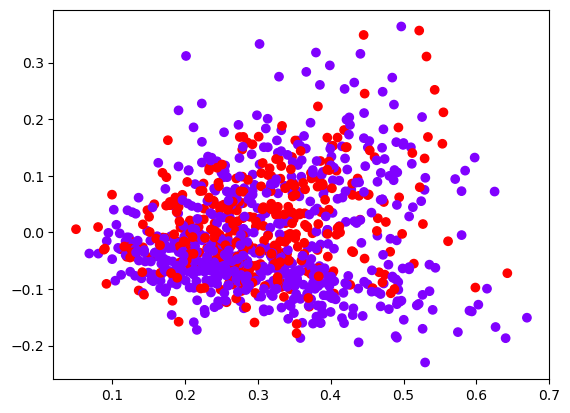

In [32]:
# Plot the data in a lower 2-dimensional space
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import numpy as np

svd = TruncatedSVD(n_components=2)
train_data_low = svd.fit_transform(train_data)
val_data_low = svd.transform(val_data)
test_data_low = svd.transform(test_data)

plt.scatter(train_data_low[:, 0], train_data_low[:, 1], c=train_labels, cmap='rainbow')
plt.show()

In [33]:
from sklearn import svm
from sklearn.metrics import classification_report

clf = svm.SVC(kernel='linear')
clf.fit(train_data, train_labels)

y_pred = clf.predict(val_data)
print(classification_report(val_labels, y_pred))

y_pred = clf.predict(test_data)
print(classification_report(test_labels, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        87
           1       0.72      0.61      0.66        38

    accuracy                           0.81       125
   macro avg       0.78      0.75      0.76       125
weighted avg       0.80      0.81      0.80       125

              precision    recall  f1-score   support

           0       0.82      0.96      0.88        91
           1       0.80      0.46      0.58        35

    accuracy                           0.82       126
   macro avg       0.81      0.71      0.73       126
weighted avg       0.81      0.82      0.80       126



In [34]:
# Print prediction examples
for i in range(10):
    print("Text: ", test_dataset[i][0])
    print("Predicted: ", clf.predict(test_data[i]))
    print("Actual: ", test_labels[i])

Text:  I watched this movie twice, trying each time to do so with an open mind and see what all the hype about this movie was about. And each time I failed. The characters are battery-operated stock characters lousily acted by good (or potentially good) actors. We have the strict and egotistical father, the pragmatic and kind mother who holds the family together, the angst-ridden adolescent played by someone aged 21 (as if any teen who reads Nietzsche wants to go into the air force), the boozing-womanizer-Brooklynite grandfather (a depiction of Norman Mailer?), the depressed, pseudo-intellectual uncle (who does not act or look depressed at all during the film) and the princess daughter who enters into a beauty pageant. What happens between the beginning and the end is scarcely relevant, much less interesting: Van breaks down. Grandpa dies (none too soon). Daughter makes fun of beauty pageant contestants by doing a strip tease to the tune of Rick James' "Superfreak." Une vraie piece de 